# Practical 10 : Implement Convolution Neural network on FER-2013 dataset of Kaggle using Python

In [ ]:
import tensorflow

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input,Conv2D,Dropout,Dense,MaxPooling2D,Flatten
from tensorflow.keras.callbacks import Callback

In [ ]:
labels = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [ ]:
data_gen = ImageDataGenerator(rescale=1/255)
test_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
data = data_gen.flow_from_directory('archive/test/',target_size=(48,48),color_mode='grayscale')
data_test = test_gen.flow_from_directory('archive/model_test/',target_size=(48,48),color_mode='grayscale')

Found 7178 images belonging to 7 classes.
Found 350 images belonging to 7 classes.


In [ ]:
data.image_shape

(48, 48, 1)

In [ ]:
data.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
data[0][0][1].shape

(48, 48, 1)

In [ ]:
import matplotlib.pyplot as plt

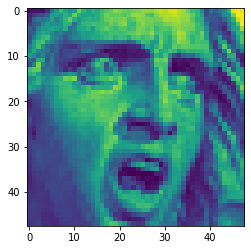

In [ ]:
plt.imshow(data[0][0][0])

In [ ]:
model = Sequential([
    Input(shape=(48,48,1)),
    Conv2D(16,3,activation='relu'),
    Conv2D(16,3,activation='relu'),
    MaxPooling2D(3),
    Conv2D(32,3,activation='relu'),
    Conv2D(32,3,activation='relu'),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(7,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 46, 46, 16)        160       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 44, 44, 16)        2320      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 12, 12, 32)        4640      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
flatten_7 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)              

In [ ]:
training_finished=False
class callback(Callback):
    def on_epoch_end(self,logs,epoch):
        if logs.get('accuracy')>0.6:
            global training_finished
            training_finished = True

In [ ]:
model.fit(data,epochs=10,validation_data=data_test)

Epoch 1/10
225/225 [==============================] - 7s 32ms/step - loss: 0.0536 - accuracy: 0.9831 - val_loss: 5.8386 - val_accuracy: 0.3886
Epoch 2/10
225/225 [==============================] - 8s 34ms/step - loss: 0.0713 - accuracy: 0.9777 - val_loss: 5.5270 - val_accuracy: 0.3857
Epoch 3/10
225/225 [==============================] - 8s 34ms/step - loss: 0.0547 - accuracy: 0.9817 - val_loss: 6.2473 - val_accuracy: 0.4400
Epoch 4/10
225/225 [==============================] - 8s 34ms/step - loss: 0.0261 - accuracy: 0.9925 - val_loss: 6.5652 - val_accuracy: 0.4286
Epoch 5/10
177/225 [======================>.......] - ETA: 1s - loss: 0.0273 - accuracy: 0.9929

In [ ]:
prediction = model.predict_classes(data_test)

c:\users\nil17\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
import numpy as np
class_pred = np.argmax(predictioniction,axis=-1)

In [ ]:
class_pred

3

In [ ]:
prediction

array([2, 3, 2, 6, 3, 3, 3, 0, 5, 6, 5, 3, 5, 3, 3, 5, 3, 5, 6, 2, 3, 6,
       4, 3, 0, 4, 0, 3, 3, 4, 4, 5, 1, 5, 5, 4, 2, 0, 6, 2, 3, 3, 2, 3,
       0, 5, 3, 2, 5, 1, 1, 5, 5, 5, 2, 5, 6, 0, 3, 0, 6, 2, 3, 3, 3, 6,
       5, 2, 5, 0, 4, 2, 3, 3, 1, 2, 2, 3, 6, 3, 3, 2, 6, 4, 0, 5, 3, 3,
       4, 3, 0, 2, 3, 4, 0, 3, 4, 3, 1, 2, 6, 4, 5, 1, 3, 3, 4, 5, 6, 3,
       5, 3, 0, 3, 6, 6, 2, 4, 1, 4, 5, 4, 3, 4, 6, 3, 0, 6, 0, 1, 0, 3,
       2, 6, 3, 5, 4, 1, 6, 2, 3, 4, 6, 0, 0, 3, 0, 3, 3, 4, 0, 3, 6, 1,
       2, 2, 1, 5, 2, 2, 5, 0, 5, 1, 6, 1, 5, 4, 0, 4, 3, 3, 0, 2, 2, 3,
       3, 5, 3, 2, 4, 2, 0, 2, 5, 2, 5, 1, 5, 2, 4, 6, 3, 4, 6, 6, 0, 4,
       0, 3, 1, 2, 4, 6, 3, 5, 1, 3, 3, 6, 3, 5, 5, 3, 3, 2, 5, 6, 4, 6,
       3, 3, 3, 5, 2, 3, 3, 0, 3, 3, 3, 5, 3, 4, 3, 3, 2, 5, 2, 3, 5, 0,
       3, 5, 3, 2, 5, 6, 6, 6, 4, 0, 5, 2, 2, 0, 2, 5, 0, 3, 3, 5, 4, 1,
       5, 4, 1, 1, 6, 2, 3, 5, 0, 0, 2, 6, 3, 0, 4, 5, 2, 5, 4, 3, 6, 0,
       5, 5, 5, 4, 6, 6, 3, 3, 3, 5, 4, 0, 2, 0, 0,